###### Data Description :
    
    HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.
    
    The dataset includes Age, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField Etc. Let us try to study the factors that lead to employee attrition
    

###### Importing Libraries :
    

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

###### Acquiring the data:

In [125]:
data=pd.read_csv("HR Employee Attrition.csv")
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

###### analyzing by describing the data:

In [126]:
pd.set_option('display.max_columns', None) # To view all the columns
#pd.set_option('display.max_rows', None) # To view all the rows

In [127]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [128]:
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


    > By Seeing at the dataset above, the dataset contains both continous and categorical data. 
    > Target Variable Attrition is Categorical Values, hence we can go for Classification Model Building Algorithms.
    > Feature variables contains both categorical/continous vlaues, Numerical/Object type values.
    > Good that there is no alphanumerical values in our dataset.

In [129]:
data.shape

(1470, 35)

In [130]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

The data contains only Object and Int data types

In [131]:
# Statistical Summary
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


    > There are 35 columns including Target Column.
    > By looking at the mean and standard deviation of each columns, we can observe that there are many outliers in the dataset. We will treat the outliers in further steps.
    > By looking at the count of each columns, there is no NULL Values in the dataset

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

##### EDA

In [133]:
#check for the Null Values in the dataset
data.isnull().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

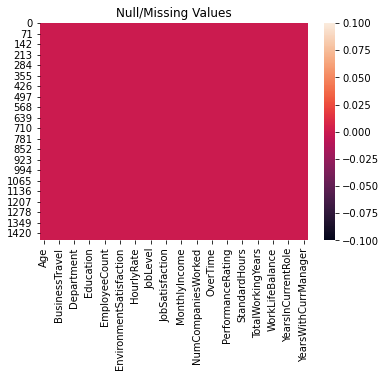

In [134]:
#Visualize Null/Missing Values
sns.heatmap(data.isnull())
plt.title("Null/Missing Values")
plt.show()

Good that we do not have any null/missing values in our dataset.

Lets check on each of the object type data.

In [135]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [136]:
data["Attrition"].unique()

array(['Yes', 'No'], dtype=object)

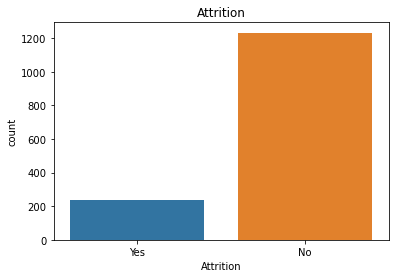

In [137]:
sns.countplot(x=data["Attrition"], data=data)
plt.title("Attrition")
plt.show()

Target Variable is a Binary Output, has only yes or No values in the dataset. We will encode this in the future steps.

In [138]:
data['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

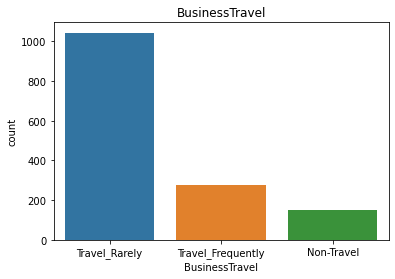

In [139]:
sns.countplot(x=data["BusinessTravel"], data=data)
plt.title("BusinessTravel")
plt.show()

There are only 3 categorical values in column 'BusinessTravel'. we will encode this in future steps.

In [140]:
data['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

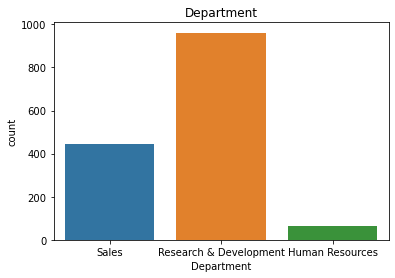

In [141]:
sns.countplot(x=data["Department"], data=data)
plt.title("Department")
plt.show()

There are only 3 departments found in the whole dataset. we will encode this in future steps.

In [142]:
data['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

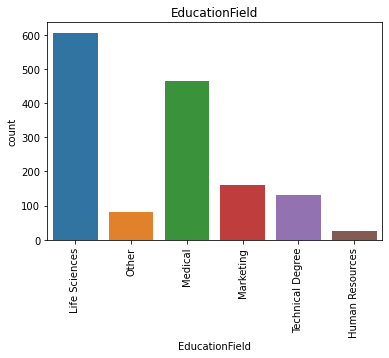

In [143]:
sns.countplot(x=data["EducationField"], data=data)
plt.xticks(rotation='vertical')
plt.title("EducationField")
plt.show()

There are 6 various EducationField found.

In [144]:
data["Gender"].unique()

array(['Female', 'Male'], dtype=object)

There are only 2 categories Female and Male. This can be removed as the gender does not affect the Attrition.

In [145]:
data.drop(['Gender'], axis=1, inplace=True)

In [146]:
data['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

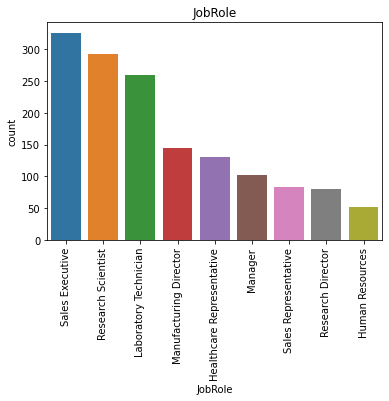

In [147]:
sns.countplot(x=data["JobRole"], data=data)
plt.xticks(rotation='vertical')
plt.title("JobRole")
plt.show()

There are 9 different jobroles 

In [148]:
data['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

This feature is not related to Attrition, hence we can drop this column.

In [149]:
data.drop(['MaritalStatus'], axis=1, inplace=True)

In [150]:
data['Over18'].unique()

array(['Y'], dtype=object)

Over18 column has only one value Y, hence we can drop this column.

In [151]:
data.drop(['Over18'], axis=1, inplace=True)

In [152]:
data['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

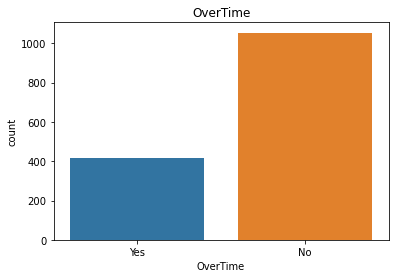

In [153]:
sns.countplot(x=data["OverTime"], data=data)
plt.title("OverTime")
plt.show()

###### Encoding of Object Data:
Lets encode all the object type data.

In [154]:
from sklearn.preprocessing import OrdinalEncoder

OE = OrdinalEncoder()

for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=OE.fit_transform(data[i].values.reshape(-1,1))

In [155]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2.0,1102,2.0,1,2,1.0,1,1,2,94,3,2,7.0,4,5993,19479,8,1.0,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0.0,1.0,279,1.0,8,1,1.0,1,2,3,61,2,2,6.0,2,5130,24907,1,0.0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1.0,2.0,1373,1.0,2,2,4.0,1,4,4,92,2,1,2.0,3,2090,2396,6,1.0,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0.0,1.0,1392,1.0,3,4,1.0,1,5,4,56,3,1,6.0,3,2909,23159,1,1.0,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0.0,2.0,591,1.0,2,1,3.0,1,7,1,40,3,1,2.0,2,3468,16632,9,0.0,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0.0,1.0,884,1.0,23,2,3.0,1,2061,3,41,4,2,2.0,4,2571,12290,4,0.0,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,0.0,2.0,613,1.0,6,1,3.0,1,2062,4,42,2,3,0.0,1,9991,21457,4,0.0,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,0.0,2.0,155,1.0,4,3,1.0,1,2064,2,87,4,2,4.0,2,6142,5174,1,1.0,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,0.0,1.0,1023,2.0,2,3,3.0,1,2065,4,63,2,2,7.0,2,5390,13243,2,0.0,14,3,4,80,0,17,3,2,9,6,0,8


Now we have converted all our object type data to numeric values using OrdinalEncoder method

###### Correlation Matrix:
Lets check the correlation matrix 

<AxesSubplot:>

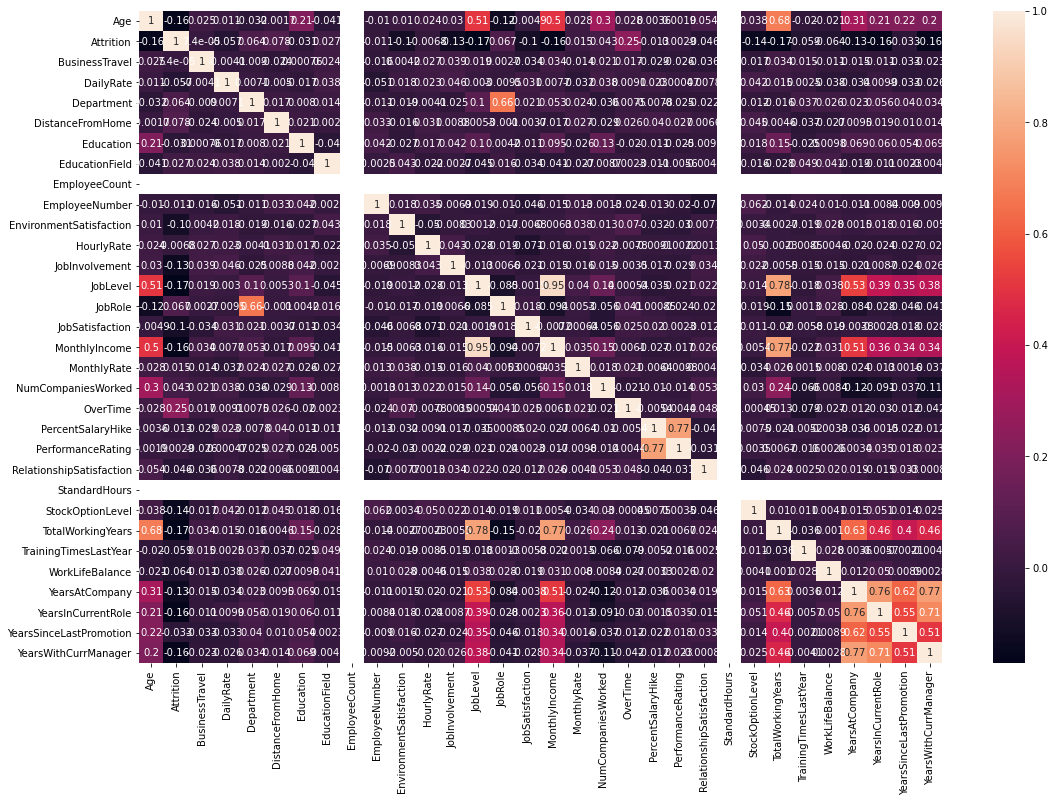

In [156]:
data_cor=data.corr()

fig=plt.figure(figsize=(18,12))
df=data.corr(method='pearson')
sns.heatmap(data_cor,annot=True)

In [157]:
data_cor['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
Y

There is very minimal correlation with all the feature sets with target variable. 
We have got NaN values for EmployeeCount and StandardHours as the values is same in entire dataset 1 and 80 respectively.

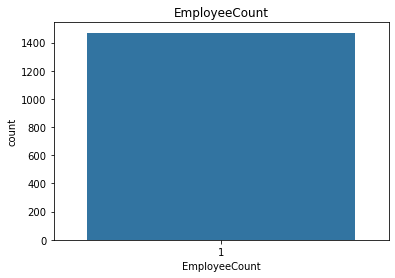

In [158]:
sns.countplot(x=data['EmployeeCount'], data=data)
plt.title("EmployeeCount")
plt.show()

There is only one value for the column EmployeeCount So we can drop this column as there is no information available.

In [159]:
data.drop(["EmployeeCount"],axis=1, inplace=True)

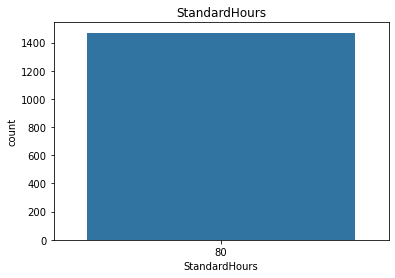

In [160]:
sns.countplot(x=data['StandardHours'], data=data)
plt.title("StandardHours")
plt.show()

There is only one value for the column StandardHours So we can drop this column as there is no information available.

In [161]:
data.drop(['StandardHours'], axis=1, inplace=True)

Now lets look at the attrition ratio and the attrition at different levels.

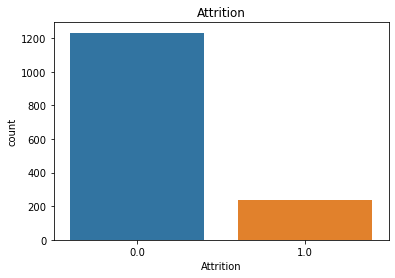

In [162]:
sns.countplot(x=data["Attrition"], data=data)
plt.title("Attrition")
plt.show()


In [163]:
data["Attrition"].value_counts()

0.0    1233
1.0     237
Name: Attrition, dtype: int64

Now by looking at the figures above, for every 5 employees, 1 is getting affected by the attrition.

Lets see each feature vs target variable "Attrition".

In [164]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

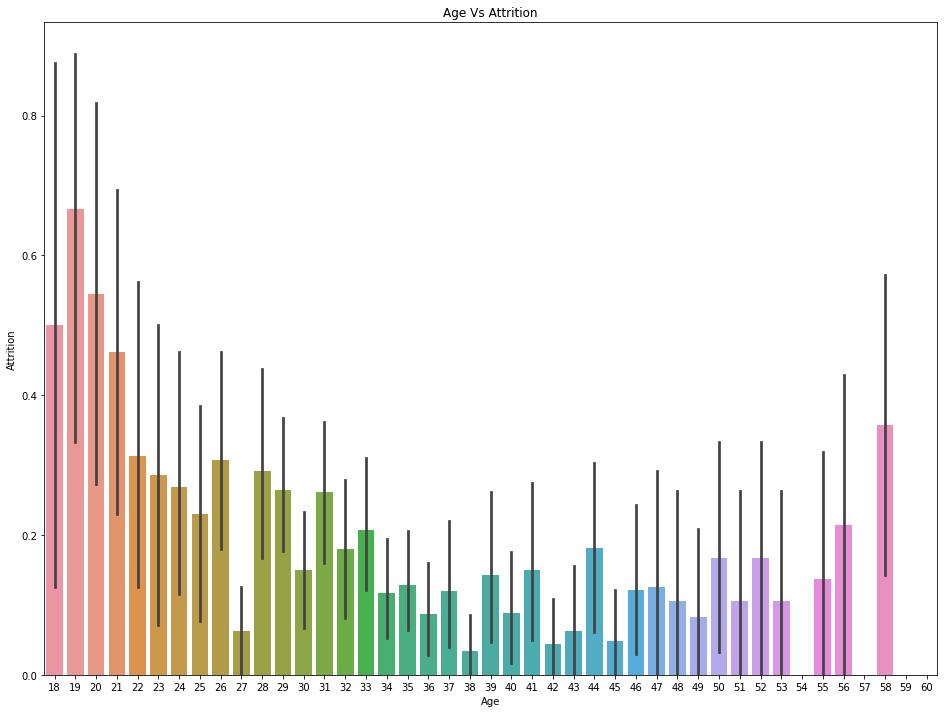

In [165]:
plt.figure(figsize=(16,12))
sns.barplot(x=data["Age"], y=data["Attrition"],data=data)
plt.title("Age Vs Attrition")
plt.show()

By seeing the above graph, Age is not a barrier for attrition. 

Lets separate feature (x) and target (y) variables

In [166]:
x=data.drop(["Attrition"], axis=1)
y=data["Attrition"]

In [167]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2.0,1102,2.0,1,2,1.0,1,2,94,3,2,7.0,4,5993,19479,8,1.0,11,3,1,0,8,0,1,6,4,0,5
1,49,1.0,279,1.0,8,1,1.0,2,3,61,2,2,6.0,2,5130,24907,1,0.0,23,4,4,1,10,3,3,10,7,1,7
2,37,2.0,1373,1.0,2,2,4.0,4,4,92,2,1,2.0,3,2090,2396,6,1.0,15,3,2,0,7,3,3,0,0,0,0
3,33,1.0,1392,1.0,3,4,1.0,5,4,56,3,1,6.0,3,2909,23159,1,1.0,11,3,3,0,8,3,3,8,7,3,0
4,27,2.0,591,1.0,2,1,3.0,7,1,40,3,1,2.0,2,3468,16632,9,0.0,12,3,4,1,6,3,3,2,2,2,2


In [168]:
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: Attrition, dtype: float64

In [169]:
x.keys()

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Lets view all the feature columns against the target set.

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

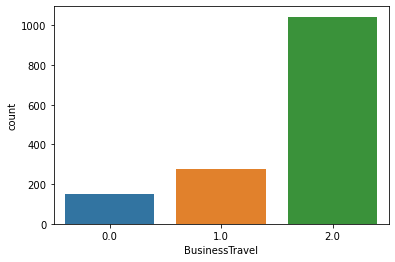

In [170]:
sns.countplot(x='BusinessTravel', data=x)

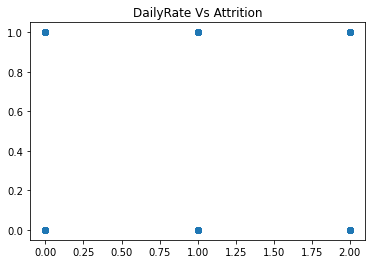

In [171]:
plt.scatter(data['BusinessTravel'],data['Attrition'])
plt.title("DailyRate Vs Attrition")
plt.show()

We can see in each category of BusinessTravel, there are cases where attrition is True.

<AxesSubplot:xlabel='DailyRate', ylabel='Density'>

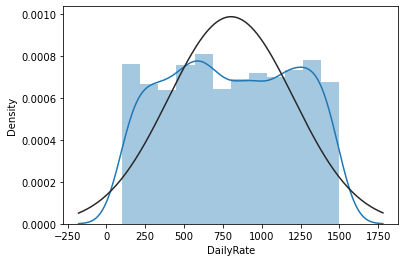

In [172]:
from scipy.stats import norm
sns.distplot(a=x.DailyRate, fit=norm)

<AxesSubplot:xlabel='Department', ylabel='count'>

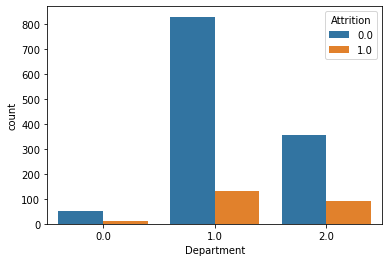

In [173]:
sns.countplot(x="Department", data=data, hue="Attrition")

There were attrition irrespective of the department

<AxesSubplot:xlabel='DistanceFromHome', ylabel='count'>

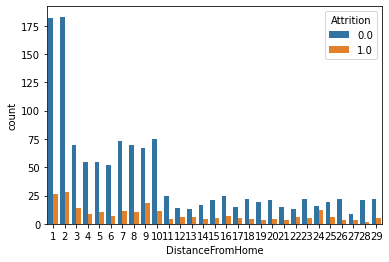

In [174]:
sns.countplot(x="DistanceFromHome", data=data, hue="Attrition")

Attrition is happening irrespective of the DistanceFromHome

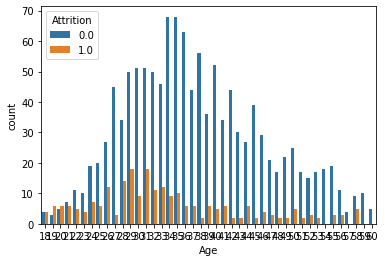

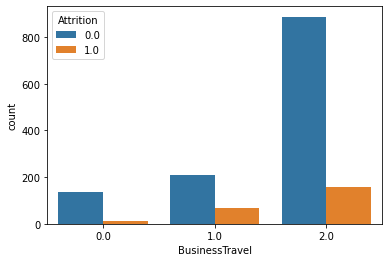

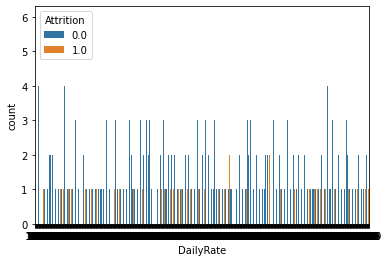

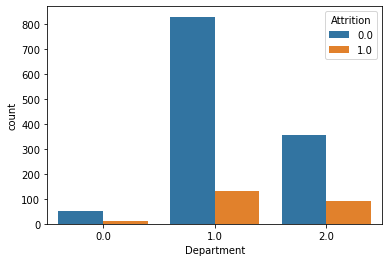

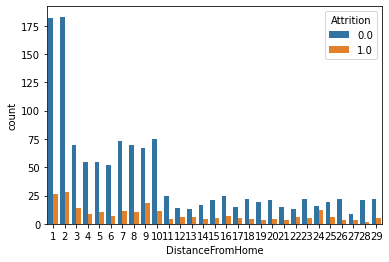

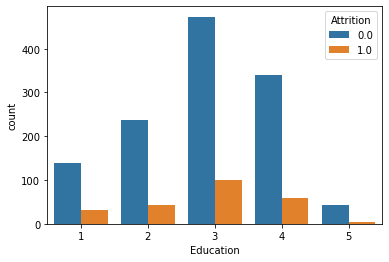

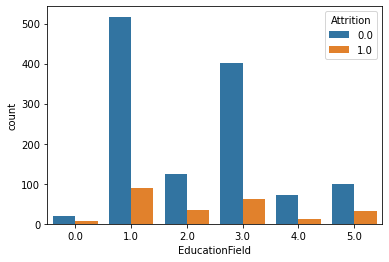

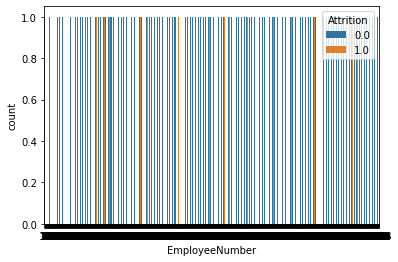

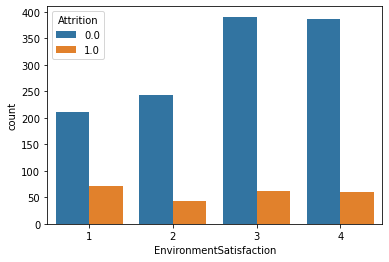

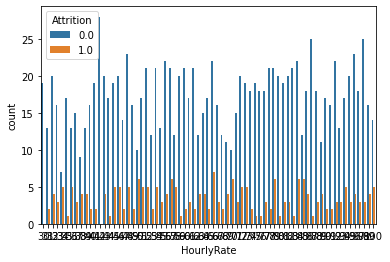

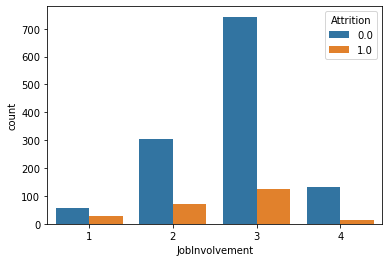

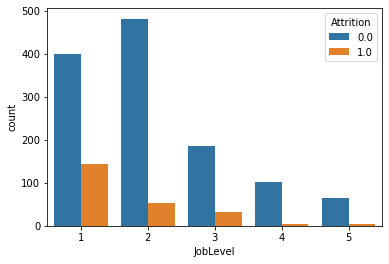

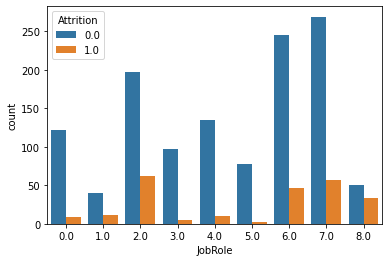

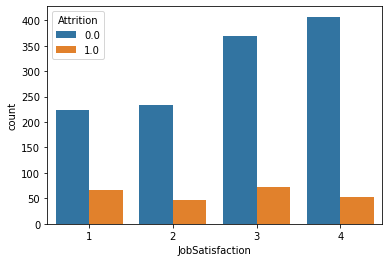

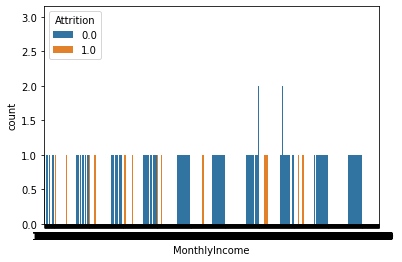

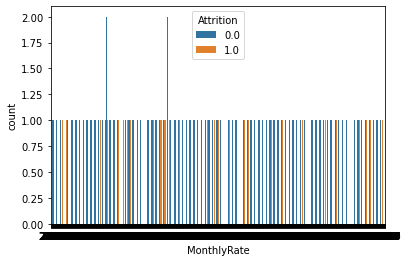

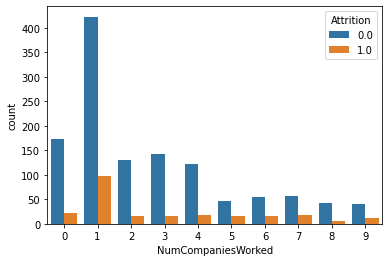

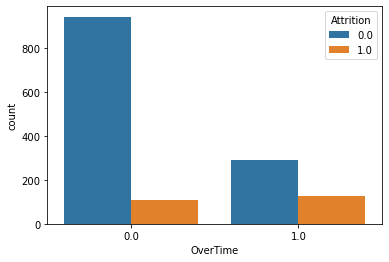

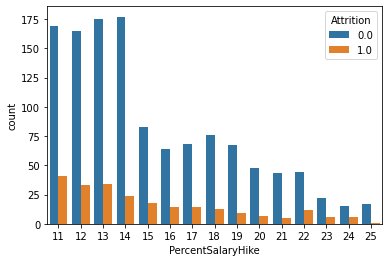

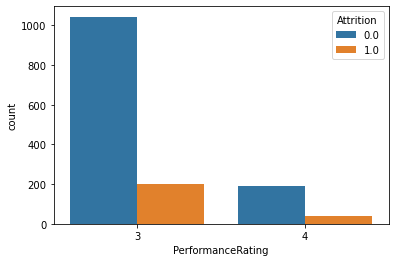

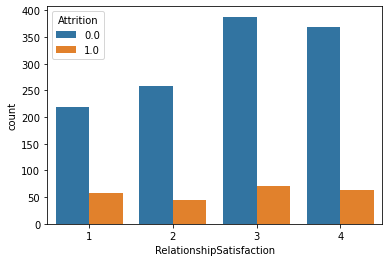

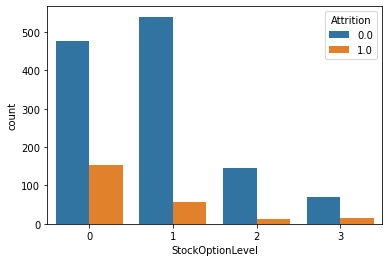

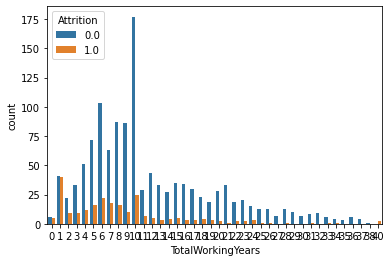

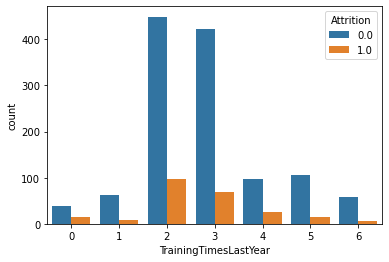

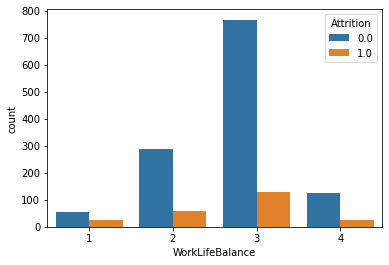

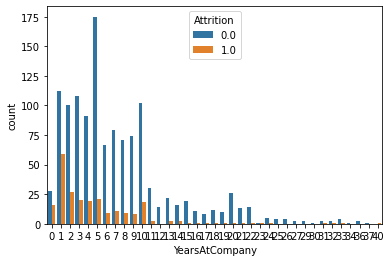

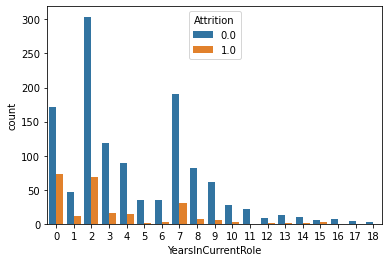

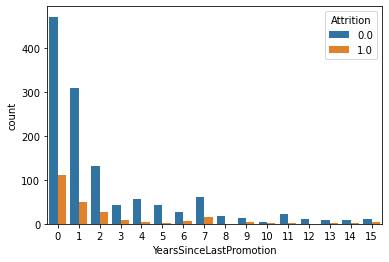

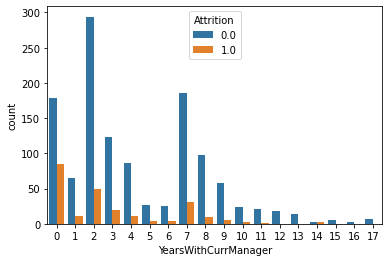

In [175]:
for i in x.keys():
    sns.countplot(x=i, data=data, hue="Attrition")
    plt.show()

From the above Visualization, we can say that irrespective any feature, Attrition is happening.
Lets see if MonthlyIncome Contributes to Attrition

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

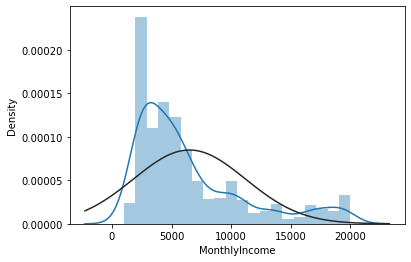

In [177]:
sns.distplot(a=x.MonthlyIncome, fit=norm)

The density of less paid emploees are more compared to large scale income employees.
The Large pay scale employee may affect more for Attrition

We can drop EmployeeNumber column as it does not provide any information

In [178]:
x.drop(["EmployeeNumber"], axis=1, inplace=True)
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2.0,1102,2.0,1,2,1.0,2,94,3,2,7.0,4,5993,19479,8,1.0,11,3,1,0,8,0,1,6,4,0,5
1,49,1.0,279,1.0,8,1,1.0,3,61,2,2,6.0,2,5130,24907,1,0.0,23,4,4,1,10,3,3,10,7,1,7
2,37,2.0,1373,1.0,2,2,4.0,4,92,2,1,2.0,3,2090,2396,6,1.0,15,3,2,0,7,3,3,0,0,0,0
3,33,1.0,1392,1.0,3,4,1.0,4,56,3,1,6.0,3,2909,23159,1,1.0,11,3,3,0,8,3,3,8,7,3,0
4,27,2.0,591,1.0,2,1,3.0,1,40,3,1,2.0,2,3468,16632,9,0.0,12,3,4,1,6,3,3,2,2,2,2


###### MinMaxScalar:
Now its time to scale or data to bring them to one scalar format.


In [179]:
from sklearn.preprocessing import MinMaxScaler

mms=MinMaxScaler()

x_mms=mms.fit_transform(x)

print(x_mms.mean(), x_mms.std())


0.40911680388442245 0.32803427344777103


In [180]:
x=pd.DataFrame(x_mms, columns=x.columns)

In [181]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,1.0,0.715820,1.0,0.000000,0.25,0.2,0.333333,0.914286,0.666667,0.25,0.875,1.000000,0.262454,0.698053,0.888889,1.0,0.000000,0.0,0.000000,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118
1,0.738095,0.5,0.126700,0.5,0.250000,0.00,0.2,0.666667,0.442857,0.333333,0.25,0.750,0.333333,0.217009,0.916001,0.111111,0.0,0.857143,1.0,1.000000,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765
2,0.452381,1.0,0.909807,0.5,0.035714,0.25,0.8,1.000000,0.885714,0.333333,0.00,0.250,0.666667,0.056925,0.012126,0.666667,1.0,0.285714,0.0,0.333333,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000
3,0.357143,0.5,0.923407,0.5,0.071429,0.75,0.2,1.000000,0.371429,0.666667,0.00,0.750,0.666667,0.100053,0.845814,0.111111,1.0,0.000000,0.0,0.666667,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000
4,0.214286,1.0,0.350036,0.5,0.035714,0.00,0.6,0.000000,0.142857,0.666667,0.00,0.250,0.333333,0.129489,0.583738,1.000000,0.0,0.071429,0.0,1.000000,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647


In [182]:
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: Attrition, dtype: float64

###### Train Test Split:
Now Lets split our dataset into Train and Test data

In [188]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.20)

In [189]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1176, 28) (1176,) (294, 28) (294,)


###### Model Building :

In [193]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score


lr=LogisticRegression()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
svc=SVC()
gnb=GaussianNB()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()

model=[lr, dtc, knn, svc, gnb, rfc, abc]

for m in model:
    m.fit(x_train, y_train)
    pred_m=m.predict(x_test)
    acc_m=accuracy_score(y_test, pred_m)
    fpr,tpr,thresholds=roc_curve(y_test,pred_m)
    auc_score=roc_auc_score(y_test,pred_m)
    print('Accuracy Score of',m,'is :',acc_m)
    print("Confusion_Matrix",confusion_matrix(y_test,pred_m))
    print("Classification_Report", classification_report(y_test,pred_m))
    print("fpr",fpr)
    print("tpr",tpr)
    print("thresholds",thresholds)
    print("auc_score", auc_score)
    print('\n')

Accuracy Score of LogisticRegression() is : 0.891156462585034
Confusion_Matrix [[250   3]
 [ 29  12]]
Classification_Report               precision    recall  f1-score   support

         0.0       0.90      0.99      0.94       253
         1.0       0.80      0.29      0.43        41

    accuracy                           0.89       294
   macro avg       0.85      0.64      0.68       294
weighted avg       0.88      0.89      0.87       294

fpr [0.         0.01185771 1.        ]
tpr [0.         0.29268293 1.        ]
thresholds [2. 1. 0.]
auc_score 0.6404126096596934


Accuracy Score of DecisionTreeClassifier() is : 0.7993197278911565
Confusion_Matrix [[219  34]
 [ 25  16]]
Classification_Report               precision    recall  f1-score   support

         0.0       0.90      0.87      0.88       253
         1.0       0.32      0.39      0.35        41

    accuracy                           0.80       294
   macro avg       0.61      0.63      0.62       294
weighted avg     

We have got the highest AUC ROC Score using AdaBoostClassifier, ie,74.42%  

###### Cross Validation :

In [216]:
lr_score=cross_val_score(lr, x,y,cv=5)
dtc_score=cross_val_score(dtc, x,y,cv=5)
knn_score=cross_val_score(knn, x,y,cv=5)
svc_score=cross_val_score(svc, x,y,cv=5)
gnb_score=cross_val_score(gnb, x,y,cv=5)
rfc_score=cross_val_score(rfc, x,y,cv=5)
abc_score=cross_val_score(abc, x,y,cv=5)
                          
cross_val_model=[lr_score,dtc_score,knn_score,svc_score,gnb_score,rfc_score,abc_score]

for i in cross_val_model:
    print("Mean Accuracy Score is",i.mean())
    print("Std of accuracy score is", i.std())
    print("\n")
          

Mean Accuracy Score is 0.8666666666666666
Std of accuracy score is 0.008711733656371233


Mean Accuracy Score is 0.7870748299319728
Std of accuracy score is 0.02146902563001295


Mean Accuracy Score is 0.8489795918367345
Std of accuracy score is 0.00821975916571056


Mean Accuracy Score is 0.863265306122449
Std of accuracy score is 0.014494745409974492


Mean Accuracy Score is 0.7863945578231293
Std of accuracy score is 0.023702382843788252


Mean Accuracy Score is 0.8578231292517007
Std of accuracy score is 0.006937441515092232


Mean Accuracy Score is 0.8687074829931973
Std of accuracy score is 0.02024881097433634




In [201]:
lr_score=cross_val_score(lr, x,y,cv=5,scoring="roc_auc")
dtc_score=cross_val_score(dtc, x,y,cv=5,scoring="roc_auc")
knn_score=cross_val_score(knn, x,y,cv=5,scoring="roc_auc")
svc_score=cross_val_score(svc, x,y,cv=5,scoring="roc_auc")
gnb_score=cross_val_score(gnb, x,y,cv=5,scoring="roc_auc")
rfc_score=cross_val_score(rfc, x,y,cv=5,scoring="roc_auc")
abc_score=cross_val_score(abc, x,y,cv=5,scoring="roc_auc")

cross_val_model=[lr_score,dtc_score,knn_score,svc_score,gnb_score,rfc_score,abc_score]

for i in cross_val_model:
    #print("Accuracy Score is",i.mean())
    print("Mean of AUC_ROC_Score is", i.mean())
    #print("Std of AUC_ROC_Score is", i.std())
          
    

Mean of AUC_ROC_Score is 0.8142240764512909
Mean of AUC_ROC_Score is 0.6233017932890588
Mean of AUC_ROC_Score is 0.6937447088932729
Mean of AUC_ROC_Score is 0.8208365344054853
Mean of AUC_ROC_Score is 0.7681971074330005
Mean of AUC_ROC_Score is 0.8015588550234714
Mean of AUC_ROC_Score is 0.8219265388665601


In [204]:
cross_val_score(abc, x,y,cv=5,scoring="roc_auc").mean()

0.8219265388665601

The score is higher for AdaBoostClassifier, the accuracy score is 86.87% and roc_auc score is 82.19%

###### Tuning the Parameter:

In [217]:
from sklearn.model_selection import GridSearchCV

In [218]:
param={"base_estimator":[lr,dtc,svc],
       "learning_rate":[0.001,0.01,0.1],
       "n_estimators":[10,100,500]}

In [219]:
GCV=GridSearchCV(abc, param, refit=True, cv=5, verbose=2)
GCV.fit(x_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] base_estimator=LogisticRegression(), learning_rate=0.001, n_estimators=10 
[CV]  base_estimator=LogisticRegression(), learning_rate=0.001, n_estimators=10, total=   0.1s
[CV] base_estimator=LogisticRegression(), learning_rate=0.001, n_estimators=10 
[CV]  base_estimator=LogisticRegression(), learning_rate=0.001, n_estimators=10, total=   0.1s
[CV] base_estimator=LogisticRegression(), learning_rate=0.001, n_estimators=10 
[CV]  base_estimator=LogisticRegression(), learning_rate=0.001, n_estimators=10, total=   0.1s
[CV] base_estimator=LogisticRegression(), learning_rate=0.001, n_estimators=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  base_estimator=LogisticRegression(), learning_rate=0.001, n_estimators=10, total=   0.1s
[CV] base_estimator=LogisticRegression(), learning_rate=0.001, n_estimators=10 
[CV]  base_estimator=LogisticRegression(), learning_rate=0.001, n_estimators=10, total=   0.1s
[CV] base_estimator=LogisticRegression(), learning_rate=0.001, n_estimators=100 
[CV]  base_estimator=LogisticRegression(), learning_rate=0.001, n_estimators=100, total=   0.5s
[CV] base_estimator=LogisticRegression(), learning_rate=0.001, n_estimators=100 
[CV]  base_estimator=LogisticRegression(), learning_rate=0.001, n_estimators=100, total=   0.5s
[CV] base_estimator=LogisticRegression(), learning_rate=0.001, n_estimators=100 
[CV]  base_estimator=LogisticRegression(), learning_rate=0.001, n_estimators=100, total=   0.5s
[CV] base_estimator=LogisticRegression(), learning_rate=0.001, n_estimators=100 
[CV]  base_estimator=LogisticRegression(), learning_rate=0.001, n_estimators=100, total=   0.6s
[CV] base_estimator=Lo

[CV]  base_estimator=DecisionTreeClassifier(), learning_rate=0.01, n_estimators=10, total=   0.0s
[CV] base_estimator=DecisionTreeClassifier(), learning_rate=0.01, n_estimators=10 
[CV]  base_estimator=DecisionTreeClassifier(), learning_rate=0.01, n_estimators=10, total=   0.0s
[CV] base_estimator=DecisionTreeClassifier(), learning_rate=0.01, n_estimators=10 
[CV]  base_estimator=DecisionTreeClassifier(), learning_rate=0.01, n_estimators=10, total=   0.0s
[CV] base_estimator=DecisionTreeClassifier(), learning_rate=0.01, n_estimators=10 
[CV]  base_estimator=DecisionTreeClassifier(), learning_rate=0.01, n_estimators=10, total=   0.0s
[CV] base_estimator=DecisionTreeClassifier(), learning_rate=0.01, n_estimators=10 
[CV]  base_estimator=DecisionTreeClassifier(), learning_rate=0.01, n_estimators=10, total=   0.0s
[CV] base_estimator=DecisionTreeClassifier(), learning_rate=0.01, n_estimators=100 
[CV]  base_estimator=DecisionTreeClassifier(), learning_rate=0.01, n_estimators=100, total=   

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   34.4s finished


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'base_estimator': [LogisticRegression(),
                                            DecisionTreeClassifier(), SVC()],
                         'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [10, 100, 500]},
             verbose=2)

In [220]:
print("Best Parameters : ",GCV.best_params_)
print("Best Estimator : ",GCV.best_estimator_)

Best Parameters :  {'base_estimator': LogisticRegression(), 'learning_rate': 0.1, 'n_estimators': 500}
Best Estimator :  AdaBoostClassifier(base_estimator=LogisticRegression(), learning_rate=0.1,
                   n_estimators=500)


In [221]:
GCV_pred=GCV.predict(x_test)
print(classification_report(y_test,GCV_pred))
print("Accuracy Score :",accuracy_score(y_test,GCV_pred))

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93       253
         1.0       1.00      0.12      0.22        41

    accuracy                           0.88       294
   macro avg       0.94      0.56      0.58       294
weighted avg       0.89      0.88      0.83       294

Accuracy Score : 0.8775510204081632


###### Saving the best Model (AdaBoostClassifier) : 


In [222]:
import joblib
joblib.dump(GCV.best_estimator_,"HR Analytics - Understanding the Attrition in HR.pkl")

['HR Analytics - Understanding the Attrition in HR.pkl']